## Carregamento e primeiros tratamentos dos dados
Neste projeto, realizaremos a exploração de dados de distúrbios do sono e testaremos a escolha de classificadores e regressores através das bibliotecas lazypredict e lazyregressor. A ideia é realizar uma exploração simples sobre o problema e testar a escolha de métodos de classificação e regressão, verificando sua performance.

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("ss.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Há dados nulos que, devido às informações obtidas no kaggle, sabemos que correspondem a pessoas sem distúrbios do sono. Sendo assim, trocaremos seu valor para 'Healthy'.

In [5]:
df.fillna('Healthy',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           373 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


Podemos perceber que a coluna de Id não nos diz nada. Sendo assim, vamos excluí-la.

In [7]:
df = df.drop("Person ID", axis = 1)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Healthy
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Healthy
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Healthy
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


##Análise exploratória dos dados

Aqui veremos como os distúrbios do sono se caracterizam em relação à idade, gênero, profissão e físico do indivíduo. Veremos primeiramente como os problemas de sono se dão em questão ao gênero.

In [8]:
df_genero = df.groupby(["Sleep Disorder", "Age","Gender"]).size().reset_index(name='Count')
df_genero = pd.DataFrame(df_genero)
df_genero = df_genero.sort_values(by=["Sleep Disorder","Count"], ascending = False)
df_genero

,Sleep Disorder,Age,Gender,Count
69,Sleep Apnea,50,Female,17
74,Sleep Apnea,59,Female,13
67,Sleep Apnea,49,Female,8
72,Sleep Apnea,57,Female,8
73,Sleep Apnea,58,Female,6
...,...,...,...,...
0,Healthy,27,Male,1
4,Healthy,31,Female,1
9,Healthy,35,Female,1
25,Healthy,49,Female,1


Definiremos faixas de idade para  realizar a plotagem do gráfico.

In [9]:
idade_min = df_genero['Age'].min()
idade_max = df_genero['Age'].max()

# Definir o número de faixas de idade desejadas
numero_faixas = 5

# Calcular o tamanho de cada faixa de idade
tamanho_faixa = (idade_max - idade_min) / numero_faixas

# Criar a lista de faixas de idade
faixas_idade = np.linspace(idade_min, idade_max, num=numero_faixas+1)

# Calcular o histograma com as contagens de desistentes em cada faixa
hist, _ = np.histogram(df_genero['Age'], bins= numero_faixas)

# Exibir os valores de desistentes em cada faixa
for i, faixa in enumerate(faixas_idade[:-1]):
    print(f'Faixa {int(faixa)}-{int(faixas_idade[i+1])}: {hist[i]} pessoas')


Faixa 27-33: 19 pessoas
Faixa 33-39: 18 pessoas
Faixa 39-46: 16 pessoas
Faixa 46-52: 12 pessoas
Faixa 52-59: 10 pessoas


In [10]:
df_genero ['Faixa_idade'] = pd.cut(df_genero['Age'],bins=[28, 34, 40, 46, 52, 60],right = False)

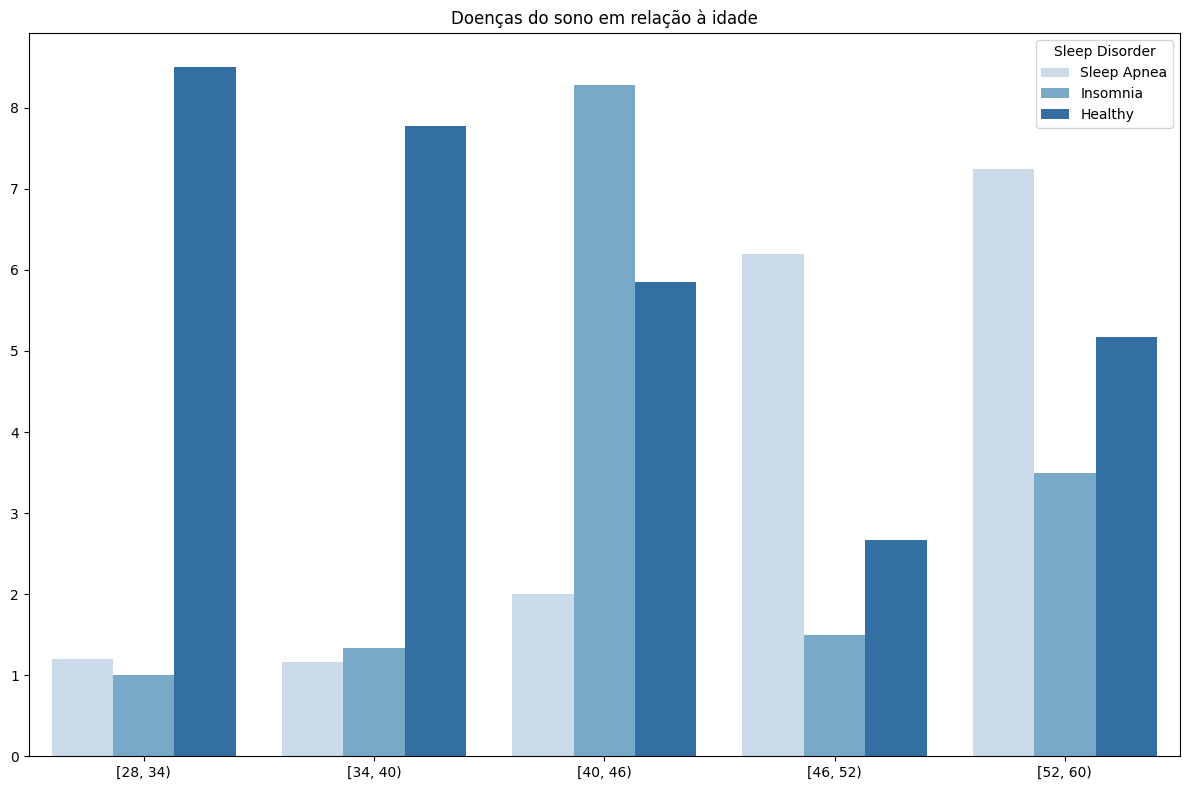

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.barplot(x="Faixa_idade", y="Count", hue = "Sleep Disorder", data=df_genero, palette= "Blues", errorbar=None)

plt.xlabel('')
plt.ylabel('')
plt.title('Doenças do sono em relação à idade')

plt.tight_layout()
plt.show()

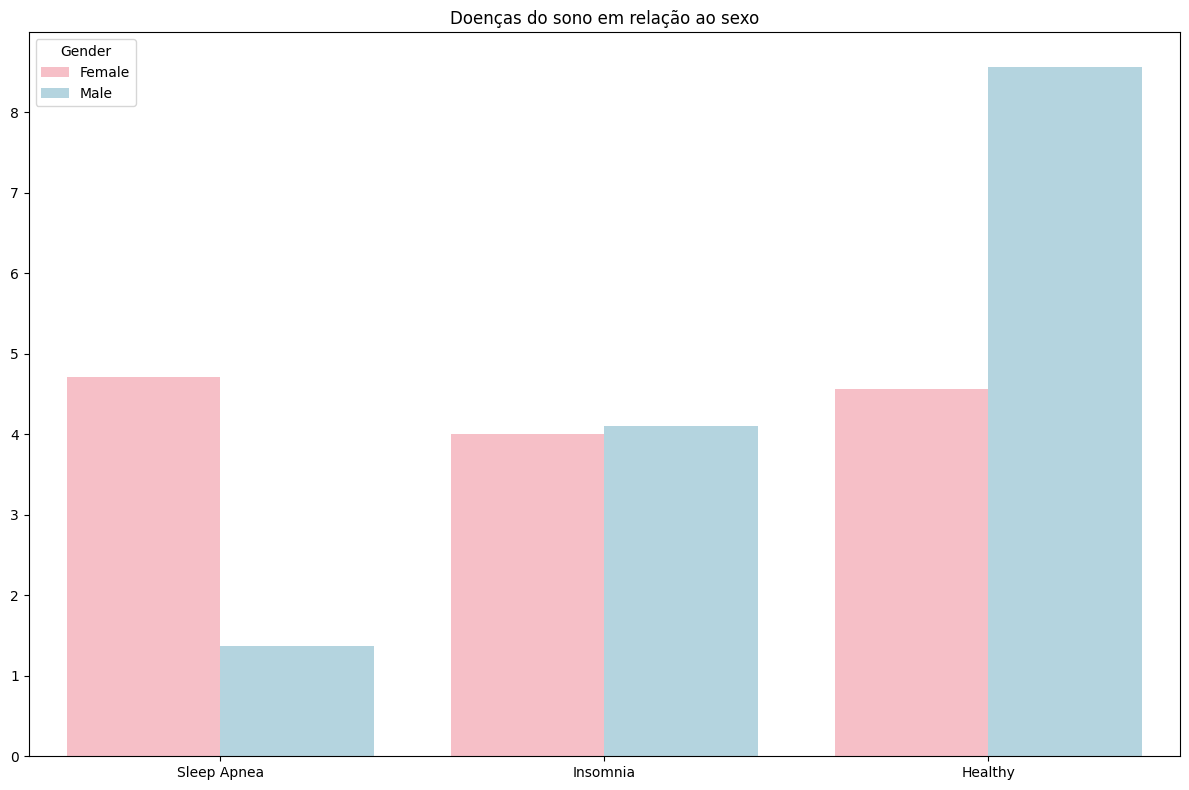

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.barplot(x="Sleep Disorder", y="Count", hue = "Gender", data=df_genero, palette=["lightpink","lightblue"], errorbar=None)

plt.xlabel('')
plt.ylabel('')
plt.title('Doenças do sono em relação ao sexo')


plt.tight_layout()
plt.show()

**Conclusão:** É possível perceber que o pico de insônia ocorre na faixa etária de 40 a 46 anos, enquanto o  pico de apnéia ocorre entre os 52 e os 60 anos.

Possivelmente a pessoa de 40 a 46 anos, ainda em idade produtiva, traz consigo problemas relacionados ao mercado de trabalho.

Já quanto à apneia, a faixa de etária mais acometida levanta hipóteses de mudanças nas vias aéreas trazidas com o envelhecimento ou até mesmo o surgimento de condições médicas decorrentes da idade.

Também vemos que mulheres sofrem mais de apnéia, enquanto homens são ligeiramente mais acometidos pela insônia.



Em seguida, a ideia é entender como as profissões são afetadas pelos distúrbios do sono.

In [13]:
df_profissao = df.groupby(["Sleep Disorder", "Occupation"]).size().reset_index(name='Count')
df_profissao = pd.DataFrame(df_profissao)
df_profissao = df_profissao.sort_values(by=["Sleep Disorder","Count"], ascending = False)
df_profissao

,Sleep Disorder,Occupation,Count
21,Sleep Apnea,Nurse,60
18,Sleep Apnea,Doctor,4
25,Sleep Apnea,Teacher,4
20,Sleep Apnea,Lawyer,3
22,Sleep Apnea,Sales Representative,2
24,Sleep Apnea,Scientist,2
19,Sleep Apnea,Engineer,1
23,Sleep Apnea,Salesperson,1
15,Insomnia,Salesperson,29
17,Insomnia,Teacher,27


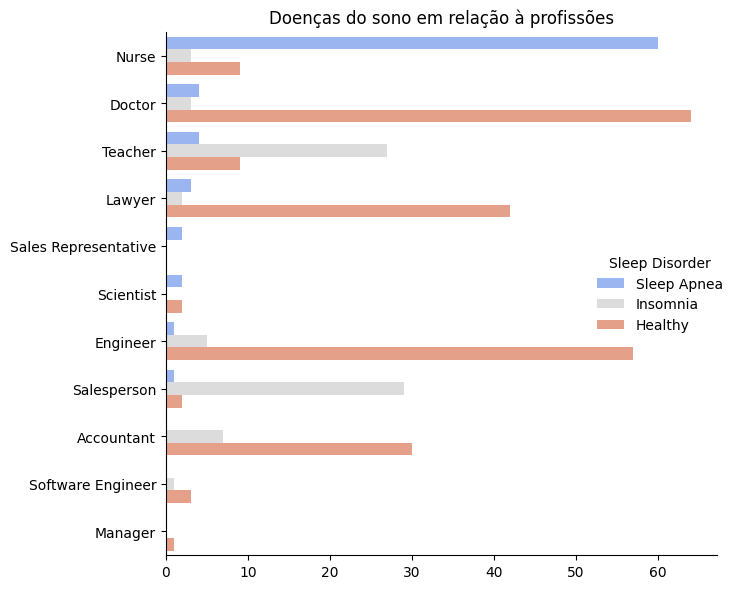

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Count", y="Occupation", hue="Sleep Disorder", data=df_profissao, kind="bar", palette= "coolwarm", height = 6)

plt.xlabel('')
plt.ylabel('')
plt.title('Doenças do sono em relação à profissões')

plt.tight_layout()
plt.show()

**Conclusão:** Podemos perceber que a insônia é predominante em vendedores e professores, enquanto a apnéia é mais comum em enfermeiras. O estresse e os horários irregulares de sono podem ser fatores relevantes que justificam esta conclusão.

Em seguida, nos focamos em algumas características físicas.

In [15]:
df_fisico = df.groupby(['Sleep Disorder','Physical Activity Level','BMI Category','Daily Steps']).size().reset_index(name='Count')
df_fisico = pd.DataFrame(df_fisico)
df_fisico = df_fisico.sort_values(by=["Sleep Disorder","Count"], ascending = False)
df_fisico

,Sleep Disorder,Physical Activity Level,BMI Category,Daily Steps,Count
60,Sleep Apnea,90,Overweight,10000,29
57,Sleep Apnea,75,Overweight,7000,27
45,Sleep Apnea,30,Obese,3000,2
46,Sleep Apnea,32,Overweight,5200,2
50,Sleep Apnea,45,Overweight,5000,2
...,...,...,...,...,...
10,Healthy,55,Normal Weight,6000,1
12,Healthy,55,Overweight,5500,1
19,Healthy,70,Normal Weight,6200,1
22,Healthy,75,Normal Weight,6800,1


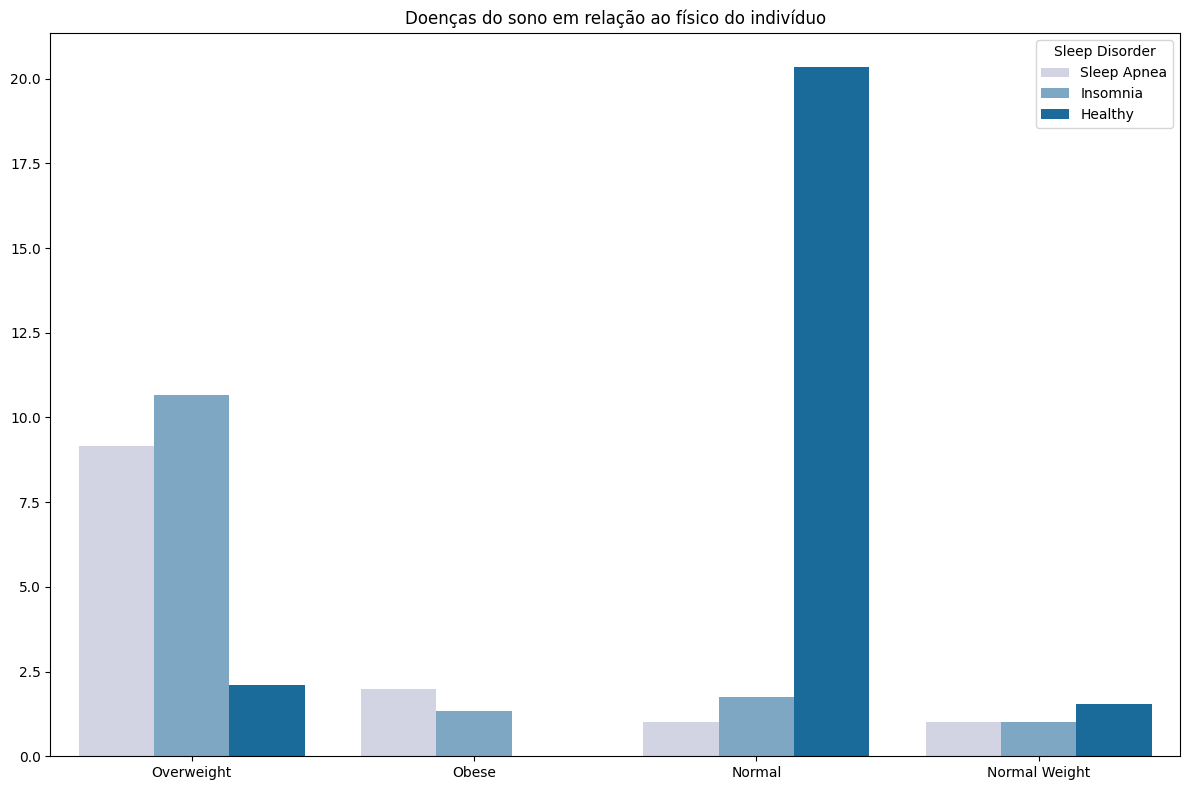

In [16]:
plt.figure(figsize=(12, 8))

sns.barplot(x="BMI Category", y="Count", hue = "Sleep Disorder", data=df_fisico, palette= "PuBu", errorbar=None)

plt.xlabel('')
plt.ylabel('')
plt.title('Doenças do sono em relação ao físico do indivíduo')

plt.tight_layout()
plt.show()

**Conclusão:** Em nossa análise em particular, pessoas com sobrepeso apresentaram mais problemas de sono que pessoas obesas. No entanto, vale ressaltar que ambos são fatores ligados a doenças do sono e a conclusão a que chegamos pode estar relacionada à nossa amostra em particular.

##Classificação do distúrbio do sono

Criaremos um modelo para classificar o distúrbio do sono do indivíduo. Iniciaremos convertendo as variáveis categórias em variáveis numéricas.

In [18]:
cat_variables = ['Occupation','BMI Category','Blood Pressure']

dados = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)

dados.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Accountant,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,Male,27,6.1,6,42,6,77,4200,Healthy,False,...,False,False,False,False,False,False,False,False,False,False
1,Male,28,6.2,6,60,8,75,10000,Healthy,False,...,False,False,False,False,False,False,False,False,False,False
2,Male,28,6.2,6,60,8,75,10000,Healthy,False,...,False,False,False,False,False,False,False,False,False,False
3,Male,28,5.9,4,30,8,85,3000,Sleep Apnea,False,...,False,False,False,False,False,False,False,True,False,False
4,Male,28,5.9,4,30,8,85,3000,Sleep Apnea,False,...,False,False,False,False,False,False,False,True,False,False


In [19]:
label_dict = {'False': 0, 'True': 1}

# Lista de colunas para aplicar o mapeamento
colunas = [
    'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
    'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
    'Occupation_Sales Representative', 'Occupation_Salesperson',
    'Occupation_Scientist', 'Occupation_Software Engineer',
    'Occupation_Teacher', 'BMI Category_Normal',
    'BMI Category_Normal Weight', 'BMI Category_Obese',
    'BMI Category_Overweight', 'Blood Pressure_115/75',
    'Blood Pressure_115/78', 'Blood Pressure_117/76',
    'Blood Pressure_118/75', 'Blood Pressure_118/76',
    'Blood Pressure_119/77', 'Blood Pressure_120/80',
    'Blood Pressure_121/79', 'Blood Pressure_122/80',
    'Blood Pressure_125/80', 'Blood Pressure_125/82',
    'Blood Pressure_126/83', 'Blood Pressure_128/84',
    'Blood Pressure_128/85', 'Blood Pressure_129/84',
    'Blood Pressure_130/85', 'Blood Pressure_130/86',
    'Blood Pressure_131/86', 'Blood Pressure_132/87',
    'Blood Pressure_135/88', 'Blood Pressure_139/91',
    'Blood Pressure_140/90', 'Blood Pressure_140/95',
    'Blood Pressure_142/92'
]

# Aplicando o mapeamento às colunas especificadas
for coluna in colunas:
    if coluna in dados.columns:
        # Converte todos os valores da coluna para string, remove espaços extras e normaliza maiúsculas/minúsculas
        dados[coluna] = dados[coluna].astype(str).str.strip().str.capitalize()
        # Aplicando o mapeamento
        dados[coluna] = dados[coluna].map(label_dict)

In [20]:
label_dict = {'Healthy':0,
              'Sleep Apnea': 1,
              'Insomnia' : 2
              }
dados['Sleep Disorder'] = dados['Sleep Disorder'].map(label_dict)
dados

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Accountant,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,Male,27,6.1,6,42,6,77,4200,0,0,...,0,0,0,0,0,False,0,0,0,0
1,Male,28,6.2,6,60,8,75,10000,0,0,...,0,0,0,0,0,False,0,0,0,0
2,Male,28,6.2,6,60,8,75,10000,0,0,...,0,0,0,0,0,False,0,0,0,0
3,Male,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,False,0,1,0,0
4,Male,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,8.1,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0
369,Female,59,8.1,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0
370,Female,59,8.0,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0
371,Female,59,8.1,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0


In [21]:
label_dict = {'Female': 0,
              'Male': 1,
             }
dados['Gender'] = dados['Gender'].map(label_dict)
dados

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Occupation_Accountant,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,1,27,6.1,6,42,6,77,4200,0,0,...,0,0,0,0,0,False,0,0,0,0
1,1,28,6.2,6,60,8,75,10000,0,0,...,0,0,0,0,0,False,0,0,0,0
2,1,28,6.2,6,60,8,75,10000,0,0,...,0,0,0,0,0,False,0,0,0,0
3,1,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,False,0,1,0,0
4,1,28,5.9,4,30,8,85,3000,1,0,...,0,0,0,0,0,False,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,59,8.1,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0
369,0,59,8.1,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0
370,0,59,8.0,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0
371,0,59,8.1,9,75,3,68,7000,1,0,...,0,0,0,0,0,False,0,0,1,0


Prosseguimos realizando a organização das colunas e normalização dos dados.

In [22]:
ordem_colunas = ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Nurse', 'Occupation_Sales Representative',
       'Occupation_Salesperson', 'Occupation_Scientist',
       'Occupation_Software Engineer', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Normal Weight',
       'BMI Category_Obese', 'BMI Category_Overweight',
       'Blood Pressure_115/75', 'Blood Pressure_115/78',
       'Blood Pressure_117/76', 'Blood Pressure_118/75',
       'Blood Pressure_118/76', 'Blood Pressure_119/77',
       'Blood Pressure_120/80', 'Blood Pressure_121/79',
       'Blood Pressure_122/80', 'Blood Pressure_125/80',
       'Blood Pressure_125/82', 'Blood Pressure_126/83',
       'Blood Pressure_128/84', 'Blood Pressure_128/85',
       'Blood Pressure_129/84', 'Blood Pressure_130/85',
       'Blood Pressure_130/86', 'Blood Pressure_131/86',
       'Blood Pressure_132/87', 'Blood Pressure_135/88',
       'Blood Pressure_135/90', 'Blood Pressure_139/91',
       'Blood Pressure_140/90', 'Blood Pressure_140/95',
       'Blood Pressure_142/92','Sleep Disorder']

dados = dados[ordem_colunas]

Manteremos os dados antes da normalização para que seja utilizado na regressão da seção seguinte. No mais, para a classificação trabalharemos com os dados normalizados.

In [23]:
dados_brutos = dados.copy()

In [24]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = dados.loc[:, 'Gender':'Blood Pressure_142/92'].columns
scaler = MinMaxScaler()
dados[cols_to_scale] = scaler.fit_transform(dados[cols_to_scale])

# Criação um novo DataFrame com os dados padronizados
dados_scaler = pd.DataFrame(dados, columns=dados.columns)

In [25]:
dados = dados_scaler
dados.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Accountant,Occupation_Doctor,...,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder
0,1.0,0.00000,0.111111,0.4,0.2,0.6,0.571429,0.171429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,1.0,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


Veremos como as variáveis se correlacionam com a classificação do distúrbio do sono. Primeiramente no dataset original e depois utilizando suas conclusões para continuar com o dataset tratado.

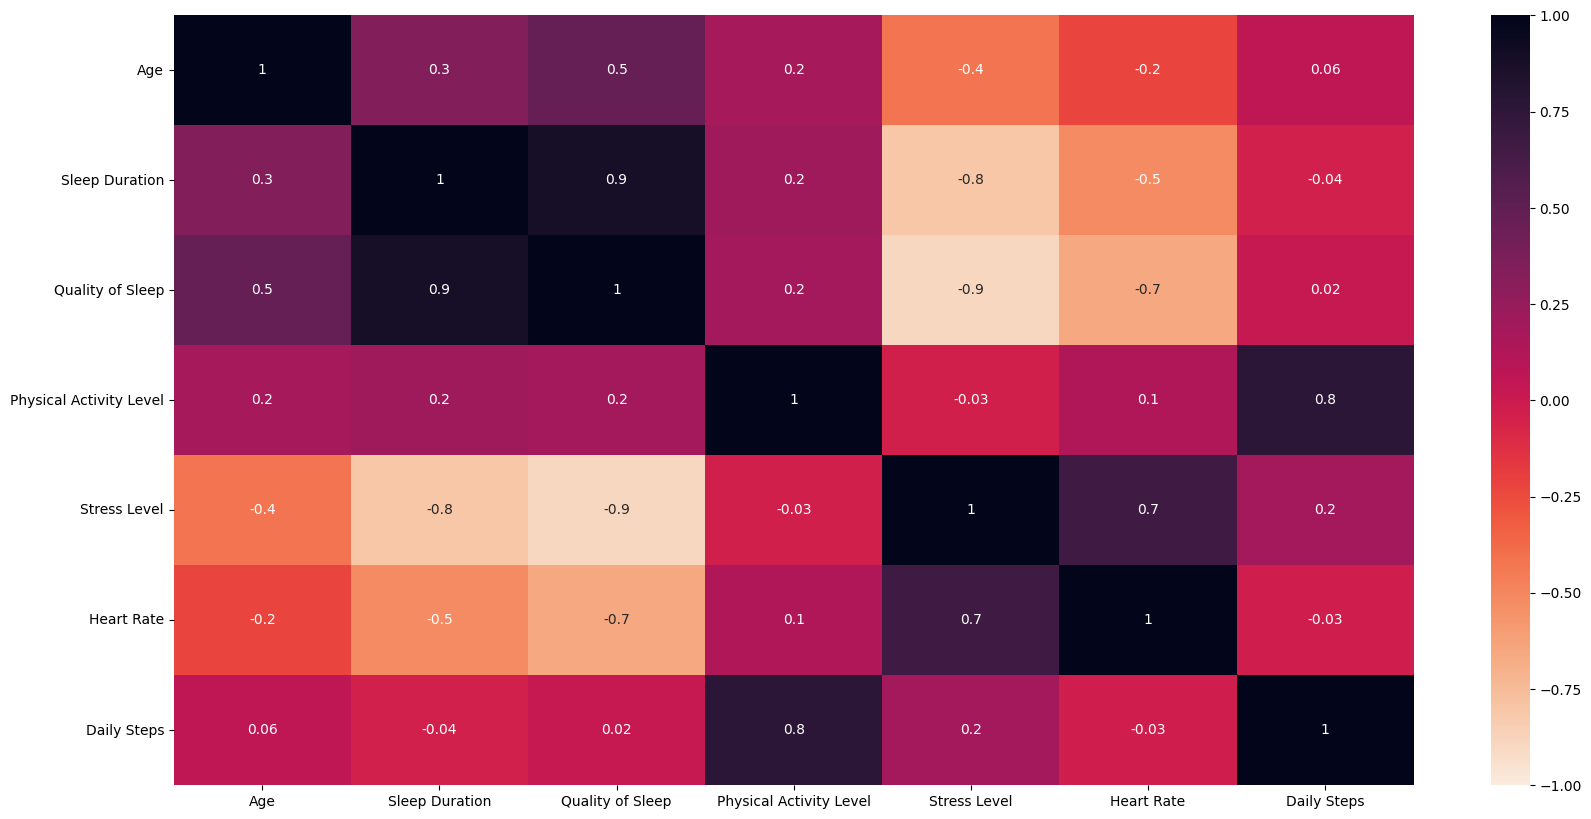

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(data=df_numeric.corr(),cmap='rocket_r',annot=True,fmt='0.1g',vmin=-1,vmax=1)
plt.show()

Percebemos que quality of sleep e sleep duration são muito correlatas entre si, bem como physical activity level e daily steps.

<Axes: >

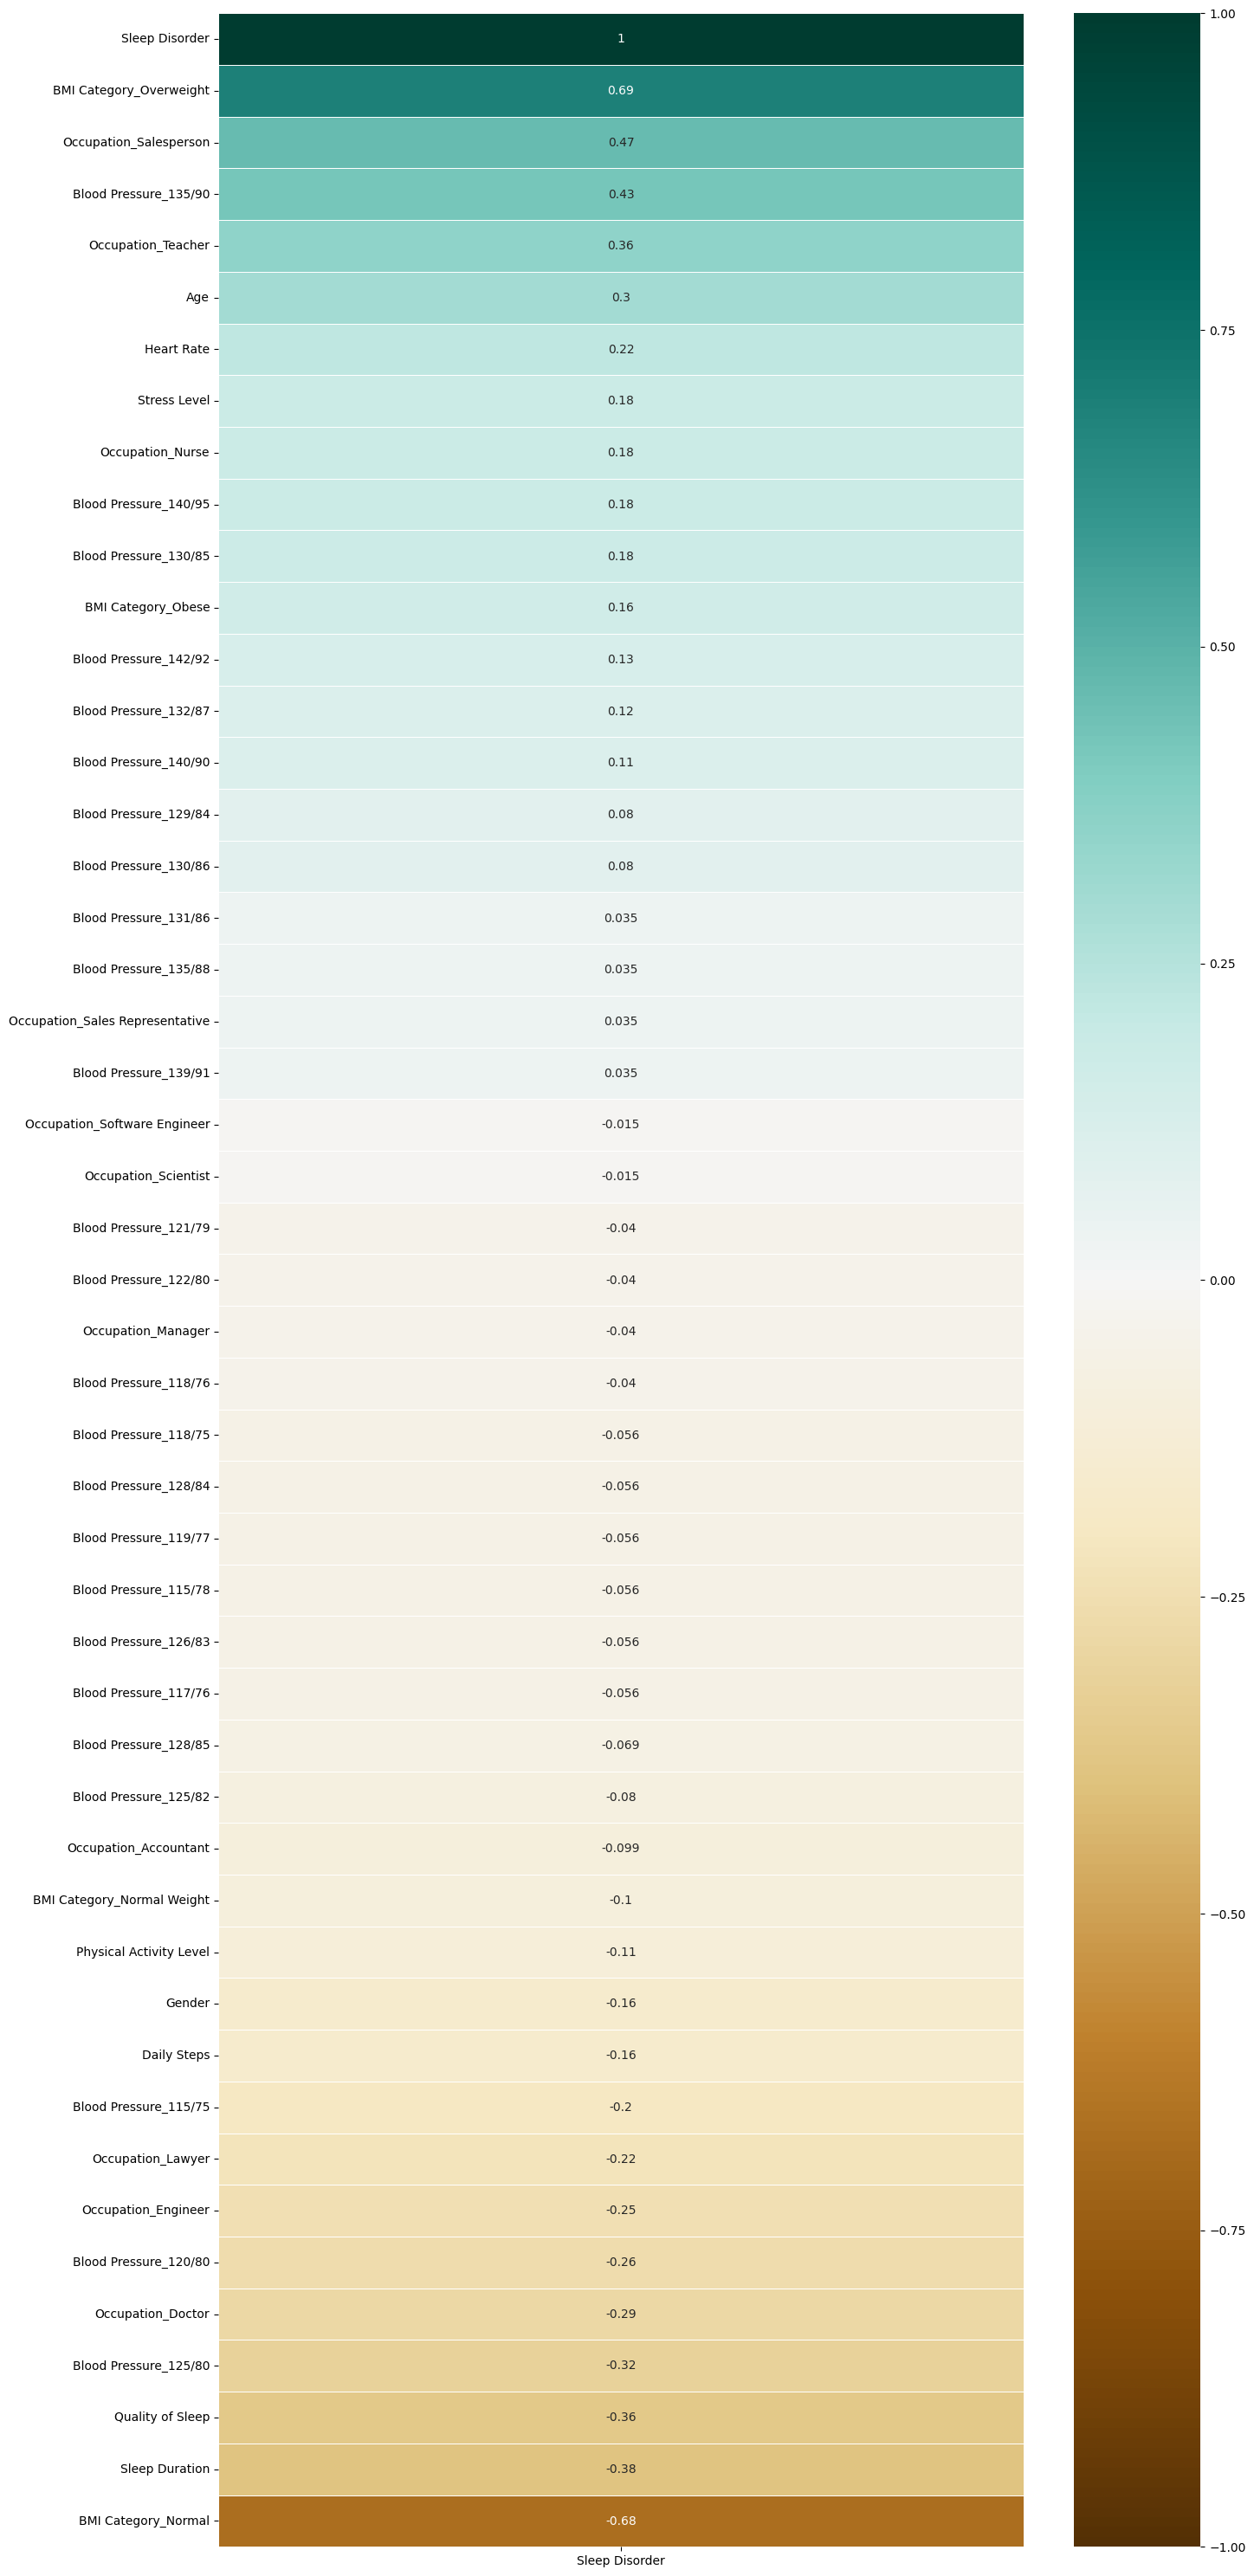

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,38))
sns.heatmap(dados.corr()[['Sleep Disorder']].sort_values(by='Sleep Disorder', ascending=False),cmap='BrBG', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

Veremos como as variáveis mais relacionadas a distúrbios do sono se relacionam entre si.

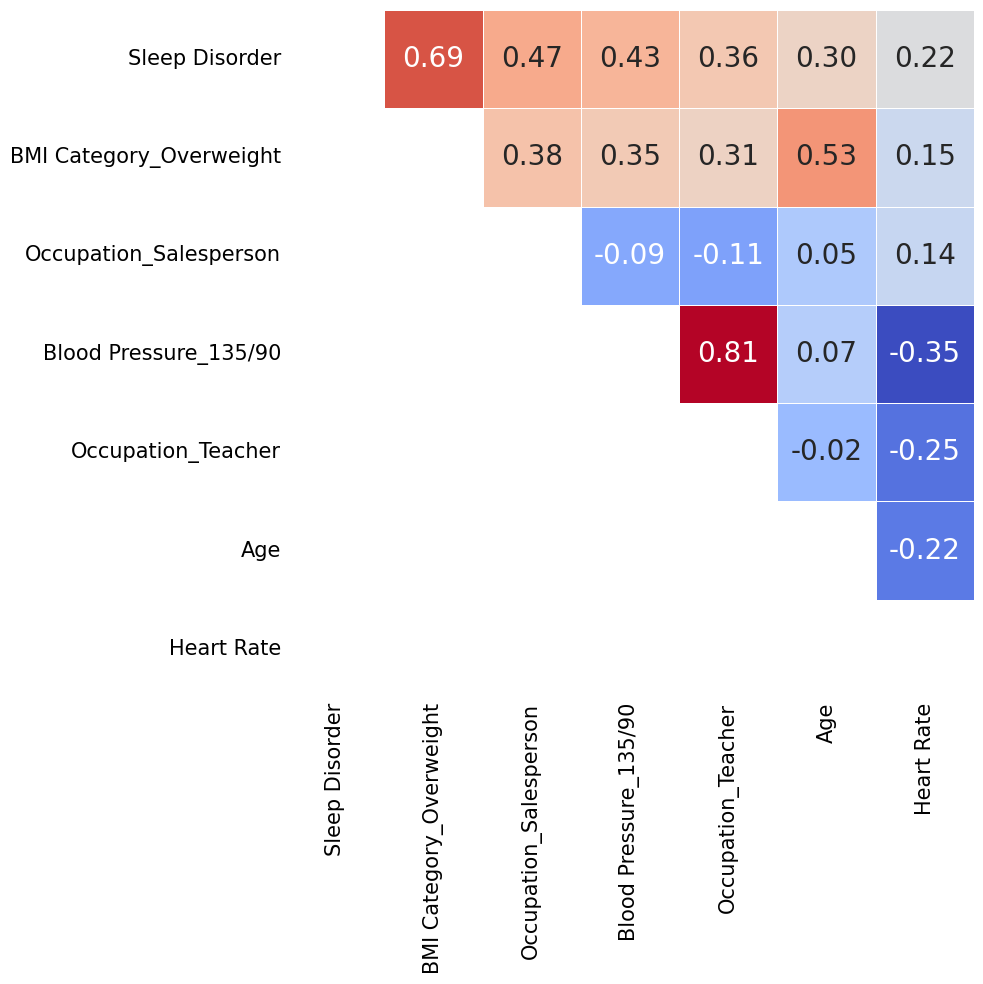

In [28]:
dados_mais_correlatos = dados[['Sleep Disorder','BMI Category_Overweight','Occupation_Salesperson','Blood Pressure_135/90',
                                'Occupation_Teacher','Age','Heart Rate' ]]


matriz_correlacao = dados_mais_correlatos.corr()

# Cria uma máscara para a matriz triangular superior
mascara_superior = matriz_correlacao.where(np.triu(np.ones(matriz_correlacao.shape), k=1).astype(bool))

# Cria uma máscara para a matriz triangular inferior
mascara_inferior = matriz_correlacao.where(np.tril(np.ones(matriz_correlacao.shape), k=-1).astype(bool))


# Ajusta o tamanho da fonte globalmente
plt.rcParams.update({'font.size': 20})  # Ajuste o valor conforme necessário

# Cria um heatmap para a matriz triangular superior
plt.figure(figsize=(20, 10))  # Ajuste o tamanho da figura conforme necessário
sns.heatmap(mascara_superior, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar=False, square=True)

# Configurações adicionais para remover o grid
sns.set(style="white")
plt.tick_params(axis='both', which='both', length=0, labelsize = 15)  # Remove ticks nos eixos

# Configura o título do gráfico
plt.title("")

# Ajusta o layout para evitar que o título seja cortado
plt.tight_layout()

# Exibe o gráfico
plt.show()

Occupation Teacher e Blood Pressure 135/90 também são muito correlatos entre si.
Realizaremos a exclusão de uma variável de cada par de variáveis muito correlatas entre si.

In [29]:
dados = dados.drop(columns = ['Quality of Sleep','Daily Steps','Blood Pressure_135/90'])
dados.head()

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder
0,1.0,0.00000,0.111111,0.2,0.6,0.571429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.03125,0.148148,0.5,1.0,0.476190,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.03125,0.148148,0.5,1.0,0.476190,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.03125,0.037037,0.0,1.0,0.952381,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,1.0,0.03125,0.037037,0.0,1.0,0.952381,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


Separação de features e target

In [30]:
X = dados.loc[:,'Gender':'Blood Pressure_142/92']
y = dados.loc[:,'Sleep Disorder']

Utilizaremos o LazyClassifier para ter uma base de performance de uma quantidade significativa de classificadores.

In [31]:
pip install lazypredict

In [32]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00, 14.18it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 20
[LightGBM] [Info] Start training from score -0.525266
[LightGBM] [Info] Start training from score -1.623879
[LightGBM] [Info] Start training from score -1.553674
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

Pensando no modelo com as melhores métricas, utilizaremos o LogisticRegressor.
Haverá uma busca de hiperparâmetros, seguida pela construção do modelo final e a classificação com as métricas finais de desempenho.

In [33]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from scipy.stats import uniform, randint


clf = LogisticRegression()

hiperparametros = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['liblinear', 'saga','elasticnet','None'],
    'max_iter' : [150, 200, 250, 300]}

skf = StratifiedKFold(n_splits= 15, shuffle=True, random_state=42)
search = RandomizedSearchCV(clf, hiperparametros, n_iter= 100, scoring='balanced_accuracy', cv=skf, random_state=42)

# Realiza a pesquisa aleatória de hiperparâmetros
search.fit(X, y)

# Exibe os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", search.best_params_)

# Exibe a melhor pontuação
print("Melhor pontuação:", search.best_score_)

Melhores hiperparâmetros: {'C': 4.665345704829102, 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}
Melhor pontuação: 0.8874074074074074


Abaixo, realizaremos a classificação feita com os melhores hiperparâmetros. Ainda neste bloco, temos a lista com os valores de desempenho, de modo a obtermos a média de cada métrica ao final da execução. O mesmo é feito com os coeficientes de importância de cada característica utilizada para a classificação.

In [34]:
# Listas para armazenar os resultados das métricas
acuracia_lista = []
precisao_lista = []
recall_lista = []
f1_lista = []
acuracia_balanceada_lista = []
coeficientes_por_execucao = []

nomes_caracteristicas = X.columns
melhores_hiperparametros = search.best_params_
modelo = LogisticRegression(**melhores_hiperparametros,random_state = 42)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modelo.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    previsoes = modelo.predict(X_test)

    # Cálculo das  métricas
    acuracia = accuracy_score(y_test, previsoes)
    acuracia_lista.append(acuracia)

    precisao = precision_score(y_test, previsoes, average='weighted')
    precisao_lista.append(precisao)

    recall = recall_score(y_test, previsoes, average='weighted')
    recall_lista.append(recall)

    f1 = f1_score(y_test, previsoes, average='weighted')
    f1_lista.append(f1)

    acuracia_balanceada = balanced_accuracy_score(y_test, previsoes)
    acuracia_balanceada_lista.append(acuracia_balanceada)

    # Coeficientes do modelo
    coeficientes = modelo.coef_
    coeficientes_por_execucao.append(coeficientes)


# Calcular as médias das métricas
acuracia_media = sum(acuracia_lista) / len(acuracia_lista)
precisao_media = sum(precisao_lista) / len(precisao_lista)
recall_media = sum(recall_lista) / len(recall_lista)
f1_media = sum(f1_lista) / len(f1_lista)
acuracia_balanceada_media = sum(acuracia_balanceada_lista) / len(acuracia_balanceada_lista)

print(f"Acurácia média: {acuracia_media*100:.2f}%")
print(f"Precisão média: {precisao_media*100:.2f}%")
print(f"Recall médio: {recall_media*100:.2f}%")
print(f"F1-score médio: {f1_media*100:.2f}%")
print(f"Acurácia balanceada média: {acuracia_balanceada_media*100:.2f}%")

Acurácia média: 90.91%
Precisão média: 92.22%
Recall médio: 90.91%
F1-score médio: 90.86%
Acurácia balanceada média: 88.74%


Veremos quais características foram consideradas mais importantes pelo modelo. Para a plotagem, selecionamos as 5 mais importantes para cada classe. Classe 0: Healthy (Saudável), Classe 1: Apneia e Classe 2: Insônia.


Classe: 0 

Blood Pressure_126/83 1.59
Blood Pressure_128/84 1.46
Blood Pressure_125/80 1.33
Blood Pressure_128/85 1.13
Blood Pressure_125/82 1.08

Classe: 1 

Heart Rate 2.42
Blood Pressure_140/95 2.30
Sleep Duration 1.41
Occupation_Sales Representative 1.37
Blood Pressure_135/88 1.16

Classe: 2 

Blood Pressure_142/92 1.43
Blood Pressure_132/87 1.28
Occupation_Accountant 1.04
Blood Pressure_130/86 1.00
BMI Category_Obese 0.98


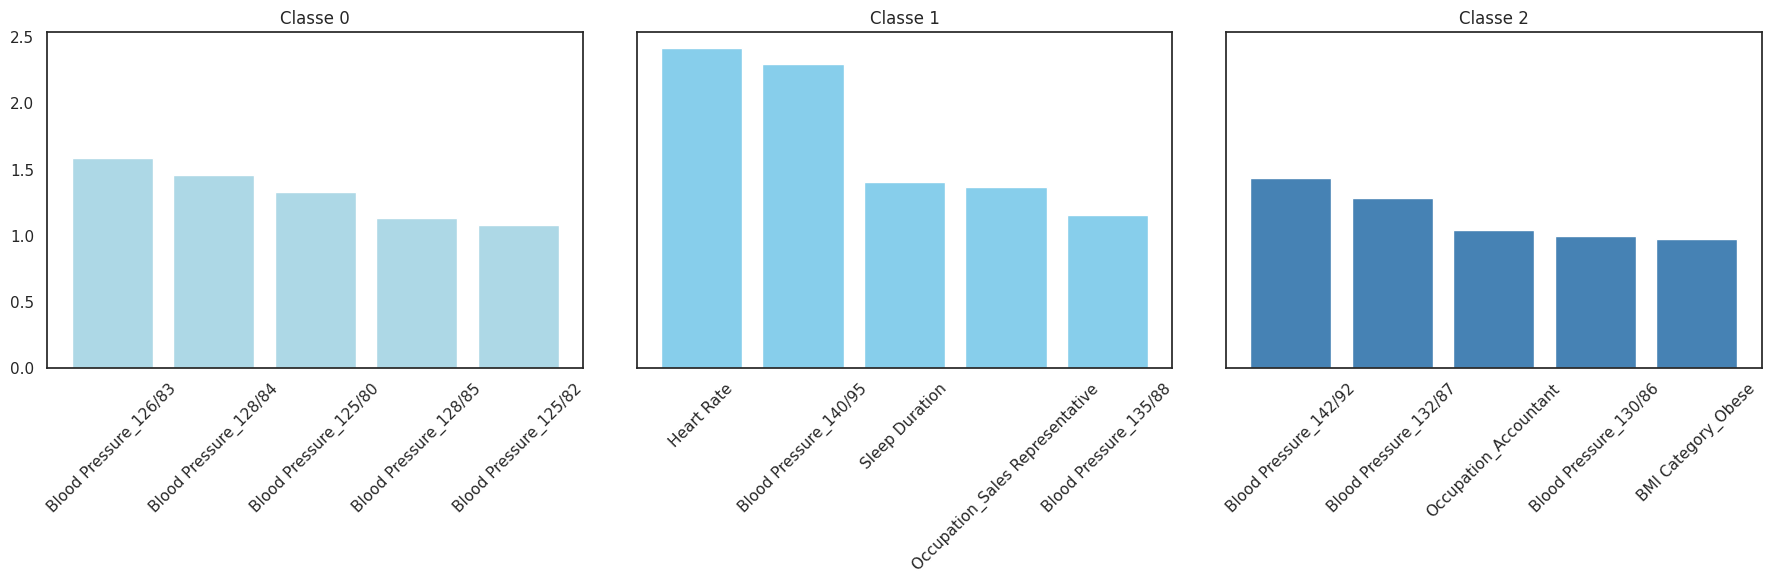

In [35]:
# Média dos coeficientes ao longo das execuções
coeficientes_media = np.mean(coeficientes_por_execucao, axis=0)

# Lista de cores para cada classe no gráfico a ser plotado
colors = ['#add8e6', '#87ceeb', '#4682b4']

# Configuração dos subplots
n_classes = 3
fig, axes = plt.subplots(1, n_classes, figsize=(18, 6), sharey=True)

# Criação do gráfico de barras para cada classe
for j, classe in enumerate(np.unique(y)):
    print("\nClasse:", classe, "\n")
    # Obtenção dos índices das características ordenadas por importância
    indices_ordem_importancia = np.argsort(coeficientes_media[j])[::-1]

    # Seleção das 5 características mais importantes
    top_indices = indices_ordem_importancia[:5]
    top_importancias = coeficientes_media[j, top_indices]
    top_nomes_caracteristicas = [nomes_caracteristicas[i] for i in top_indices]

    for indice in top_indices:
        nome_caracteristica = nomes_caracteristicas[indice]
        importancia = "{:.2f}".format(coeficientes_media[j, indice])
        print(nome_caracteristica, importancia)

    # Plotagem do gráfico de barras com cor específica
    axes[j].bar(top_nomes_caracteristicas, top_importancias, color=colors[j])
    axes[j].set_xlabel('')
    if j == 0:
        axes[j].set_ylabel('')
    axes[j].set_title(f'Classe {classe}')
    axes[j].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Percebemos que o modelo tende a levar em conta a pressão sanguínea para classificar indivíduos como saudáveis.

Para classificar alguém como possivelmente tendo apneia, o modelo considerou que além da pressão, o trabalho como representante de vendas, a taxa de batimentos cardíacos e a duração do sono são importantes.

Para insônia, a pressão sanguínea se mostrou importante, vem como o trabalho com contabilidade e a obesidade.

##Predição da duração do sono

Iniciamos realizando a preparação dos dados a partir do dataframe "dados_brutos", que deixamos separados para esta etapa. Retiraremos as colunas de alta correlação e separaremos os dados em feature e target.

In [36]:
dados_brutos = dados_brutos.drop(columns = ['Quality of Sleep','Daily Steps','Blood Pressure_135/90'])
dados_brutos.head()

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92,Sleep Disorder
0,1,27,6.10,42,6,77,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,28,6.20,60,8,75,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,28,6.20,60,8,75,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,28,5.90,30,8,85,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,28,5.90,30,8,85,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
dados_features = dados_brutos.drop(['Sleep Duration'], axis=1)
predict='Sleep Duration'
X=np.array(dados_features)
y=np.array(dados_brutos[predict])

In [38]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, shuffle = True)

Realizaremos agora a regressão com o lazyregressor para termos uma base de qual regressor escolheremos para a tarefa.

In [39]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)
models,predictions

 79%|███████▊  | 33/42 [00:02<00:00, 10.50it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:03<00:00, 11.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 279, number of used features: 20
[LightGBM] [Info] Start training from score 7.159857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

(                                                      Adjusted R-Squared  \
 Model                                                                      
 BaggingRegressor                                                    0.98   
 XGBRegressor                                                        0.98   
 ExtraTreesRegressor                                                 0.98   
 RandomForestRegressor                                               0.98   
 GradientBoostingRegressor                                           0.98   
 HistGradientBoostingRegressor                                       0.98   
 LGBMRegressor                                                       0.97   
 ExtraTreeRegressor                                                  0.97   
 DecisionTreeRegressor                                               0.97   
 AdaBoostRegressor                                                   0.95   
 KNeighborsRegressor                                                 0.93   

Diversos regressores possuem bom desempenho. Optaremos pelo ExtratreeRegressor, já que para o volume de dados, não há grande diferença em termos de custo computacional.

In [40]:
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)
tree = ExtraTreeRegressor().fit(X_train, y_train)
R2=tree.score(X_test,y_test)
print(f'Valor de R²: {R2:.2f}')

Valor de R²: 0.98


Podemos comparar as previsões e os valores reais

In [41]:
y_pred = tree.predict(X_test)
horas_sono = pd.DataFrame(y_pred, columns = ["Previsoes"])
horas_sono['Real'] = dados_brutos["Sleep Duration"]
horas_sono

,Previsoes,Real
0,8.43,6.10
1,6.10,6.20
2,6.05,6.20
3,8.40,5.90
4,6.09,5.90
...,...,...
89,7.20,7.30
90,8.17,7.30
91,6.09,7.30
92,7.20,7.50


Por fim, com o erro absoluto médio e o erro médio quadrático, podemos ver o quão longe a previsão ficou dos valores reais.

In [42]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_pred)
print(MAE)

0.058519848945380884


In [43]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE)

0.10092962341716966
